In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_spd_matrix
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n_samples = 200
n_features = 8

In [3]:
cov_matrix = make_spd_matrix(n_features, random_state=42)
mean_vector = np.zeros(n_features)

In [4]:
data = np.random.multivariate_normal(mean_vector, cov_matrix, size=n_samples)
columns = [f'Var{i+1}' for i in range(n_features)]
df = pd.DataFrame(data, columns=columns)

In [5]:
df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8
0,-0.537050,-1.554716,0.912353,-0.743074,0.417196,0.357445,0.064014,0.239940
1,0.644977,1.080150,-0.656576,0.731534,0.069805,-0.678115,0.495778,0.804212
2,1.448072,2.474084,-0.676480,0.429781,-1.265602,-0.957837,0.702295,-0.006450
3,0.885586,0.326621,-0.675389,0.967870,-0.970064,0.218445,0.839966,0.502164
4,-0.946058,0.796755,0.539108,0.945625,0.705171,-0.638476,0.234029,-0.361634


In [6]:
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

In [7]:
kmo_all, kmo_model = calculate_kmo(df)
print(f"KMO Test (overall): {kmo_model:.3f}")
print("KMO by variable:")
print(kmo_all)

KMO Test (overall): 0.691
KMO by variable:
[0.64675677 0.75686802 0.82189467 0.49267532 0.77155435 0.40871273
 0.7596893  0.28157738]


In [9]:
bartlett_chi2, bartlett_p = calculate_bartlett_sphericity(df)
print(f"Bartlett's Test: chi2 = {bartlett_chi2:.3f}, p-value = {bartlett_p:.3f}")

Bartlett's Test: chi2 = 981.966, p-value = 0.000


In [10]:
fa = FactorAnalyzer(n_factors=n_features, rotation=None)
fa.fit(df)

c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(n_factors=8, rotation=None, rotation_kwargs={})

In [11]:
eigenvalues, _ = fa.get_eigenvalues()
print("Eigenvalues:")
print(eigenvalues)

Eigenvalues:
[3.96950032 1.46802478 1.00312237 0.63552898 0.33161783 0.30097861
 0.20428188 0.08694522]


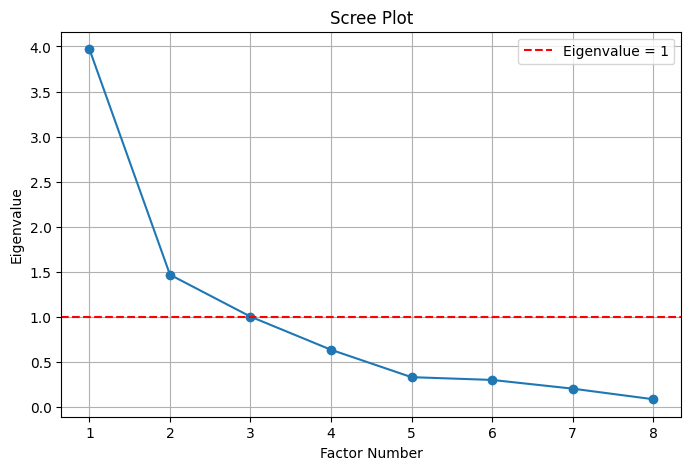

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o')
plt.title('Scree Plot')
plt.xlabel('Factor Number')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
optimal_factors = 3 
fa = FactorAnalyzer(n_factors=optimal_factors, rotation='varimax')
fa.fit(df)

c:\Users\Robyi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [14]:
loadings = pd.DataFrame(fa.loadings_, index=columns, columns=[f'Factor{i+1}' for i in range(optimal_factors)])
print("\nFactor Loadings:")
print(loadings)


Factor Loadings:
       Factor1   Factor2   Factor3
Var1  0.956534  0.320012  0.020393
Var2  0.378987  0.843716  0.050141
Var3 -0.534317 -0.570828  0.326102
Var4  0.410632  0.088440  0.643364
Var5 -0.671222 -0.547262 -0.118825
Var6 -0.027048 -0.201755 -0.059613
Var7  0.491725  0.677452  0.074841
Var8  0.149628 -0.094097 -0.719597


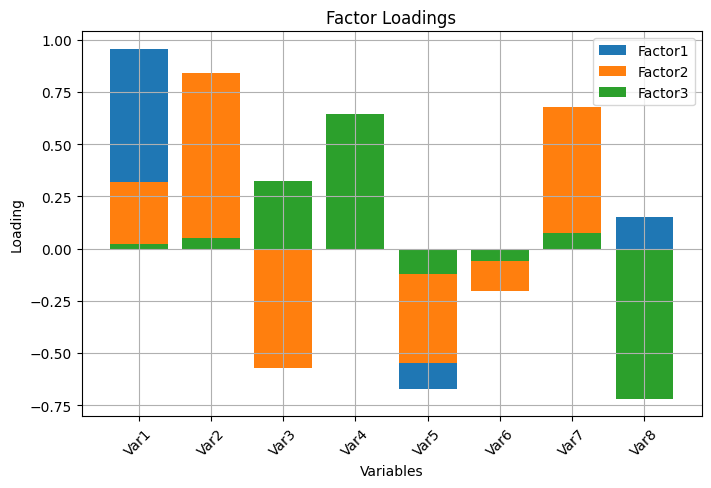

In [15]:
plt.figure(figsize=(8, 5))
for i, factor in enumerate(loadings.columns):
    plt.bar(loadings.index, loadings[factor], label=factor)
plt.title('Factor Loadings')
plt.xticks(rotation=45)
plt.xlabel('Variables')
plt.ylabel('Loading')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
variance_explained = pd.DataFrame({
    'Factor': [f'Factor{i+1}' for i in range(optimal_factors)],
    'Variance Explained (%)': fa.get_factor_variance()[1] * 100
})
print("\nVariance Explained by Each Factor:")
print(variance_explained)


Variance Explained by Each Factor:
    Factor  Variance Explained (%)
0  Factor1               27.851923
1  Factor2               24.449079
2  Factor3               13.303543
